# Players Similarity Template

In this notebook, we use PCA in order to find similar players.

The dataset contains information from FBRef so, following the source of the data, we match the same criteria for basic scouting report that allows us find similar players.

DISCLAIMER: we all see football and it's obvious the results that will be given might shock us. That's why big data analysis can't be taken as the absolute truth. However, big data analysis allow us to shortlist and also show us player replacements we could not imagine by ourselves.

## Importing libraries and datasets

Before starting with the process to find the best similarities in the world of football, we must import the libraries and the datasets we are going to work with.

Datasets have been created using a homemade FBRef scraper that you can find in this link: https://github.com/hale46/fbref-scraper

In [1]:
# libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# datasets
eu = pd.read_csv('your-path/jan_eu_df.csv', sep=';')

eu = eu.fillna(0)
eu = eu[eu['Min'] > 1339] # 1399' is the 75% of minutes played in Big5 leagues
eu

,league,season,team,player,nation,pos,age,born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgCarries,PrgPasses,PrgPassRecvd,Gls/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Tackles,TacklesWon,TklDef3rd,TklMid3rd,TklAtt3rd,DribbTkld,AttDribbTkl,DribbTkld%,ChallLost,Blocks,ShotsBlckd,PassBlckd,Interceptions,Tkl+Int,Clearances,Errors,Shots,ShotsOnTarget,ShotsOnTarget%,Shots/90,ShotsOnTarget/90,G/Shot,G/ShotOnTarget,AvgShtDist,FKShots,npxG/Shot,G-xG,npG-xG,2CrdY,Fouls,Fouled,Offsides,Crosses,PKwon,PKmade,OwnGoals,Recoveries,AerDuelsWon,AerDuelsLost,AerDuelsWon%,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_TkOns,SCA_Sh,SCA_Fouled,SCA_DefAct,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_TkOns,GCA_Sh,GCA_Fouled,GCA_DefAct,TotPassCmp,TotPassAtt,TotPassCmp%,TotPassDist,TotPrgPassDist,ShortPassCmp,ShortPassAtt,ShortPassCmp%,MedPassCmp,MedPassAtt,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,xA,A-xAG,KeyPass,PassToFinal3rd,PassToPenArea,CrossToPenArea,Min/MP,Min%,Min/Starts,ComplMatch,Subs,Min/Sub,unSub,PointsPerMatch,TeamGoalsOn,vsTeamGoalsOn,Goals-vsGoalsOn,Goals-vsGoalsOn/90,NetGoals-vsGoalsOn,TeamOnxG,TeamOnxGA,Goals-vsGoalsOnxG,Goals-vsGoalsOnxG/90,NetGoals-vsGoalsOnxG,TotTouches,TouchDefPen,TouchDef3rd,TouchMid3rd,TouchAtt3rd,TouchAttPen,LiveBallTouch,TkOnsAtt,TkOnsSucc,TkOnsSucc%,TkldWhileTkOn,TkldWhileTkOn%,Carries,TotCarrDist,PrgCarrDist,CarrToFinal3rd,CarrToPenArea,Miscontrols,Dispossessed,TotPassRcvd,LiveBallPass,DeadBallPass,FKPass,ThrBallPass,Switches,ThrInsTaken,CornerKicks,InswCK,OutswCK,StrghtCK,TotPassOffsides,TotPassBlckd
0,TUR-Süper Lig,2324,Sivasspor,Aaron Appindangoyé,GAB,DF,31.0,1992.0,16,15,1351,15.0,1,1,2,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.07,0.13,0.07,0.13,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,50.0,0.40,0.20,0.17,0.33,0.0,0.0,0.00,0.0,0.0,0,7.0,5.0,2.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,65.3,90.0,15.0,1.0,1.0,3.0,1.31,17.0,21.0,-4.0,-0.27,0.11,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NED-Eredivisie,2324,RKC Waalwijk,Aaron Meijers,NED,DF,36.0,1987.0,17,16,1433,15.9,0,4,4,0,0,0,5,0,0.1,0.1,2.0,2.1,41.0,78.0,55.0,0.00,0.25,0.25,0.00,0.25,0.01,0.12,0.13,0.01,0.13,37.0,16.0,20.0,15.0,2.0,22.0,48.0,45.8,26.0,23.0,8.0,15.0,18.0,55.0,42.0,0.0,3.0,1.0,33.3,0.19,0.06,0.00,0.00,28.3,1.0,0.03,-0.1,-0.1,0,14.0,19.0,0.0,80.0,0.0,2.0,0,98.0,19.0,16.0,54.3,34.0,2.14,24.0,6.0,0.0,1.0,2.0,1.0,4.0,0.25,3.0,1.0,0.0,0.0,0.0,0.0,675.0,963.0,70.1,11975.0,4363.0,318.0,368.0,86.4,264.0,360.0,73.3,86.0,198.0,43.4,2.1,2.0,20.0,67.0,11.0,4.0,84.0,83.8,87.0,12.0,1.0,45.0,1.0,0.88,15.0,26.0,-11.0,-0.69,1.26,17.1,24.9,-7.7,-0.49,-0.62,1141.0,65.0,349.0,538.0,263.0,10.0,1141.0,7.0,3.0,42.9,3.0,42.9,532.0,3191.0,1830.0,20.0,4.0,19.0,9.0,623.0,791.0,171.0,32.0,2.0,2.0,127.0,12.0,1.0,11.0,0.0,1.0,25.0
17,BEL-Jupiler Pro League,2324,Kortrijk,Abdelkahar Kadri,ALG,"MF,FW",23.0,2000.0,21,20,1793,19.9,2,1,3,2,0,0,2,0,4.2,4.2,2.9,7.1,68.0,130.0,88.0,0.10,0.05,0.15,0.10,0.15,0.21,0.15,0.36,0.21,0.36,56.0,26.0,32.0,20.0,4.0,18.0,49.0,36.7,31.0,35.0,0.0,35.0,21.0,77.0,18.0,1.0,37.0,9.0,24.3,1.86,0.45,0.05,0.22,20.7,6.0,0.11,-2.2,-2.2,0,16.0,38.0,4.0,84.0,0.0,0.0,0,131.0,8.0,15.0,34.8,92.0,4.62,58.0,14.0,7.0,5.0,6.0,2.0,2.0,0.10,1.0,1.0,0.0,0.0,0.0,0.0,774.0,1022.0,75.7,12007.0,4157.0,369.0,429.0,86.0,296.0,381.0,77.7,58.0,138.0,42.0,3.9,-1.9,35.0,82.0,23.0,4.0,85.0,86.6,88.0,17.0,1.0,32.0,0.0,0.71,15.0,39.0,-24.0,-1.20,1.07,18.7,35.9,-17.2,-0.87,1.84,1334.0,25.0,231.0,643.0,486.0,44.0,1334.0,116.0,65.0,56.0,46.0,39.7,956.0,6788.0,3117.0,70.0,8.0,62.0,41.0,870.0,898.0,122.0,57.0,5.0,3.0,11.0,50.0,23.0,17.0,0.0,2.0,17.0
29,SRB-Serbian SuperLiga,2324,Novi Pazar,Abdoulaye Cissé,GUI,DF

As we are going to look for similar players, we must create specific df's.

The first step is cleaning 'pos' column, leaving just the main one for those who have two.

In [3]:
eu['pos'] = eu['pos'].str[:2]

The second step is creating a joint column of player name and team. It will be useful when we execute the PCA.

In [4]:
# Europe
eu['player_team'] = eu['player'] + '_' + eu['team']
eu.insert(4, 'player_team', eu.pop('player_team'))

In [5]:
eu.columns.to_list()

['league',
 'season',
 'team',
 'player',
 'player_team',
 'nation',
 'pos',
 'age',
 'born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'xG',
 'npxG',
 'xAG',
 'npxG+xAG',
 'PrgCarries',
 'PrgPasses',
 'PrgPassRecvd',
 'Gls/90',
 'Ast/90',
 'G+A/90',
 'G-PK/90',
 'G+A-PK/90',
 'xG/90',
 'xAG/90',
 'xG+xAG/90',
 'npxG/90',
 'npxG+xAG/90',
 'Tackles',
 'TacklesWon',
 'TklDef3rd',
 'TklMid3rd',
 'TklAtt3rd',
 'DribbTkld',
 'AttDribbTkl',
 'DribbTkld%',
 'ChallLost',
 'Blocks',
 'ShotsBlckd',
 'PassBlckd',
 'Interceptions',
 'Tkl+Int',
 'Clearances',
 'Errors',
 'Shots',
 'ShotsOnTarget',
 'ShotsOnTarget%',
 'Shots/90',
 'ShotsOnTarget/90',
 'G/Shot',
 'G/ShotOnTarget',
 'AvgShtDist',
 'FKShots',
 'npxG/Shot',
 'G-xG',
 'npG-xG',
 '2CrdY',
 'Fouls',
 'Fouled',
 'Offsides',
 'Crosses',
 'PKwon',
 'PKmade',
 'OwnGoals',
 'Recoveries',
 'AerDuelsWon',
 'AerDuelsLost',
 'AerDuelsWon%',
 'SCA',
 'SCA90',
 'SCA_PassLive',
 'SCA_PassDea

The third step is choosing which stats we are going to use for each position:

In [6]:
cols_df = ['G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG+xAG', 'PrgCarries', 'PrgPassRecvd', 'Gls/90', 'Ast/90',
            'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Tackles', 'TklDef3rd',
            'TklMid3rd', 'TklAtt3rd', 'DribbTkld', 'AttDribbTkl', 'ChallLost', 'ShotsBlckd', 'PassBlckd', 'Tkl+Int', 'Shots',
            'ShotsOnTarget', 'ShotsOnTarget%', 'Shots/90', 'ShotsOnTarget/90', 'G/Shot', 'G/ShotOnTarget', 'AvgShtDist', 'FKShots',
            'npxG/Shot', 'G-xG', 'npG-xG', '2CrdY', 'Fouls', 'Fouled', 'Offsides', 'PKwon', 'AerDuelsWon', 'AerDuelsLost', 'SCA90',
            'SCA_PassLive', 'SCA_PassDead', 'SCA_TkOns', 'SCA_Sh', 'SCA_Fouled', 'SCA_DefAct', 'GCA90', 'GCA_PassLive', 'GCA_PassDead', 'GCA_TkOns',
            'GCA_Sh', 'GCA_Fouled', 'GCA_DefAct', 'TotPassCmp', 'TotPassAtt', 'TotPassDist', 'TotPrgPassDist', 'ShortPassCmp', 'ShortPassAtt',
            'ShortPassCmp%', 'MedPassCmp', 'MedPassAtt', 'MedPassCmp%', 'LongPassCmp', 'LongPassAtt', 'LongPassCmp%', 'xA', 'A-xAG', 'KeyPass',
            'PassToFinal3rd', 'PassToPenArea', 'CrossToPenArea', 'Min/MP', 'Min%', 'Min/Starts', 'ComplMatch', 'Subs', 'Min/Sub', 'unSub',
            'PointsPerMatch', 'TeamGoalsOn', 'vsTeamGoalsOn', 'Goals-vsGoalsOn', 'Goals-vsGoalsOn/90', 'NetGoals-vsGoalsOn', 'TeamOnxG', 'TeamOnxGA',
            'Goals-vsGoalsOnxG', 'Goals-vsGoalsOnxG/90', 'NetGoals-vsGoalsOnxG', 'TotTouches', 'TouchDefPen', 'TouchDef3rd', 'TouchMid3rd',
            'TouchAtt3rd', 'TouchAttPen', 'LiveBallTouch', 'TkOnsAtt', 'TkOnsSucc', 'TkOnsSucc%', 'TkldWhileTkOn', 'TkldWhileTkOn%', 'Carries',
            'TotCarrDist', 'PrgCarrDist', 'CarrToFinal3rd', 'CarrToPenArea', 'Miscontrols', 'Dispossessed', 'TotPassRcvd', 'LiveBallPass',
            'DeadBallPass', 'FKPass', 'ThrBallPass', 'Switches', 'ThrInsTaken', 'CornerKicks', 'InswCK', 'OutswCK', 'StrghtCK', 'TotPassOffsides',
            'TotPassBlckd']

cols_mf = ['G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG+xAG', 'PrgPassRecvd', 'Gls/90', 'Ast/90',
            'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Tackles', 'TklDef3rd',
            'TklMid3rd', 'TklAtt3rd', 'DribbTkld', 'AttDribbTkl', 'DribbTkld%', 'ChallLost', 'ShotsBlckd', 'PassBlckd', 
            'Tkl+Int', 'ShotsOnTarget', 'Shots/90', 'ShotsOnTarget/90', 'G/Shot', 'G/ShotOnTarget',
            'AvgShtDist', 'FKShots', 'npxG/Shot', 'G-xG', 'npG-xG', '2CrdY', 'Fouls', 'Fouled', 'Offsides', 'PKmade', 'OwnGoals',
            'AerDuelsWon', 'AerDuelsLost', 'SCA90', 'SCA_PassLive', 'SCA_PassDead', 'SCA_TkOns', 'SCA_Sh',
            'SCA_Fouled', 'SCA_DefAct', 'GCA90', 'GCA_PassLive', 'GCA_PassDead', 'GCA_TkOns', 'GCA_Sh', 'GCA_Fouled', 'GCA_DefAct',
            'TotPassCmp', 'TotPassDist', 'TotPrgPassDist', 'ShortPassCmp', 'ShortPassAtt', 'ShortPassCmp%',
            'MedPassCmp', 'MedPassAtt', 'MedPassCmp%', 'LongPassCmp', 'LongPassAtt', 'LongPassCmp%', 'xA', 'A-xAG', 'PassToFinal3rd',
            'Min/MP', 'Min%', 'Min/Starts', 'ComplMatch', 'Subs', 'Min/Sub', 'unSub', 'PointsPerMatch',
            'TeamGoalsOn', 'vsTeamGoalsOn', 'Goals-vsGoalsOn', 'Goals-vsGoalsOn/90', 'NetGoals-vsGoalsOn', 'TeamOnxG', 'TeamOnxGA',
            'Goals-vsGoalsOnxG', 'Goals-vsGoalsOnxG/90', 'NetGoals-vsGoalsOnxG', 'TotTouches', 'TouchDefPen', 'TouchDef3rd', 'TouchMid3rd',
            'LiveBallTouch', 'TkOnsAtt', 'TkOnsSucc', 'TkldWhileTkOn', 'TkldWhileTkOn%', 'TotCarrDist', 'PrgCarrDist', 'CarrToFinal3rd',
            'CarrToPenArea', 'Miscontrols', 'Dispossessed', 'TotPassRcvd', 'LiveBallPass', 'DeadBallPass', 'FKPass', 'ThrBallPass',
            'Switches', 'ThrInsTaken', 'CornerKicks', 'InswCK', 'OutswCK', 'StrghtCK', 'TotPassOffsides', 'TotPassBlckd']

cols_fw = ['G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG+xAG', 'PrgPassRecvd', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90',
           'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Tackles', 'TacklesWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'DribbTkld',
           'AttDribbTkl', 'DribbTkld%', 'ChallLost', 'Blocks', 'ShotsBlckd', 'PassBlckd', 'Interceptions', 'Tkl+Int', 'Clearances', 'Errors',
           'ShotsOnTarget', 'Shots/90', 'ShotsOnTarget/90', 'G/Shot', 'G/ShotOnTarget', 'AvgShtDist', 'FKShots', 'npxG/Shot', 'npG-xG', '2CrdY',
           'Fouls', 'Fouled', 'PKmade', 'OwnGoals', 'Recoveries', 'AerDuelsWon', 'AerDuelsLost', 'SCA90', 'SCA_PassLive', 'SCA_PassDead',
           'SCA_TkOns', 'SCA_Sh', 'SCA_Fouled', 'SCA_DefAct', 'GCA90', 'GCA_PassLive', 'GCA_PassDead', 'GCA_TkOns', 'GCA_Sh', 'GCA_Fouled',
           'GCA_DefAct', 'TotPassCmp', 'TotPassAtt', 'TotPassCmp%', 'TotPassDist', 'TotPrgPassDist', 'ShortPassCmp', 'ShortPassAtt',
           'ShortPassCmp%', 'MedPassCmp', 'MedPassAtt', 'MedPassCmp%', 'LongPassCmp', 'LongPassAtt', 'LongPassCmp%', 'xA', 'A-xAG',
           'KeyPass', 'PassToFinal3rd', 'PassToPenArea', 'CrossToPenArea', 'Min/MP', 'Min%', 'Min/Starts', 'ComplMatch', 'Subs', 'Min/Sub',
           'unSub', 'PointsPerMatch', 'TeamGoalsOn', 'vsTeamGoalsOn', 'Goals-vsGoalsOn', 'Goals-vsGoalsOn/90', 'NetGoals-vsGoalsOn',
           'TeamOnxG', 'TeamOnxGA', 'Goals-vsGoalsOnxG', 'Goals-vsGoalsOnxG/90', 'NetGoals-vsGoalsOnxG', 'TotTouches', 'TouchDefPen',
           'TouchDef3rd', 'TouchMid3rd', 'TouchAtt3rd', 'LiveBallTouch', 'TkOnsSucc', 'TkldWhileTkOn', 'TkldWhileTkOn%', 'Carries',
           'TotCarrDist', 'PrgCarrDist', 'CarrToFinal3rd', 'CarrToPenArea', 'Miscontrols', 'Dispossessed', 'TotPassRcvd', 'LiveBallPass',
           'DeadBallPass', 'FKPass', 'ThrBallPass', 'Switches', 'ThrInsTaken', 'CornerKicks', 'InswCK', 'OutswCK', 'StrghtCK', 'TotPassOffsides',
           'TotPassBlckd']


And now we create the df's.

#### Europe

In [7]:
# Defenders
eu_df = eu.drop(cols_df, axis=1)
eu_df = eu_df.fillna(0)
eu_df = eu_df[eu_df['pos'] == 'DF']

# Midfielders
eu_mf = eu.drop(cols_mf, axis=1)
eu_mf = eu_mf.fillna(0)
eu_mf = eu_mf[eu_mf['pos'] == 'MF']

# Forwrards
eu_fw = eu.drop(cols_fw, axis=1)
eu_fw = eu_fw.fillna(0)
eu_fw = eu_fw[eu_fw['pos'] == 'FW']

## PCA Model

First, we will divide metrics on **X** and player name on **y**.

Then, we will scale the metrics.

In [8]:
# division of metrics on X and player name on y
X, y = eu_mf.iloc[:, 12:].values, eu_mf.iloc[:, 4].values

# scaling the metrics
X_std = StandardScaler().fit_transform(X)

Now we are going to execute the dimensionality reduction.

In [9]:
pca = PCA(n_components = len(eu_mf.columns)-12)
pca.fit(X_std)
X_pca = pca.transform(X_std)

Let's see how many dimensions interest us.

Shape x_PCA:  (569, 30)
Explained Variance: 0 components: 0
Explained Variance: 2 components: 0.6825096481903731
Explained Variance: 4 components: 0.7814377802234788
Explained Variance: 6 components: 0.8399415630722555
Explained Variance: 8 components: 0.888823377929623
Explained Variance: 10 components: 0.9246287720025468
Explained Variance: 12 components: 0.9475632051461198
Explained Variance: 14 components: 0.9628684253430985
Explained Variance: 16 components: 0.9741810675188709
Explained Variance: 18 components: 0.9830943991479809
Explained Variance: 20 components: 0.9892882181899884
Explained Variance: 22 components: 0.9937315782177921
Explained Variance: 24 components: 0.9969580148482917
Explained Variance: 26 components: 0.9986245665987825
Explained Variance: 28 components: 0.9996906982953178
Explained Variance: 30 components: 0.9999999999999998
Explained Variance: 32 components: 0.9999999999999998


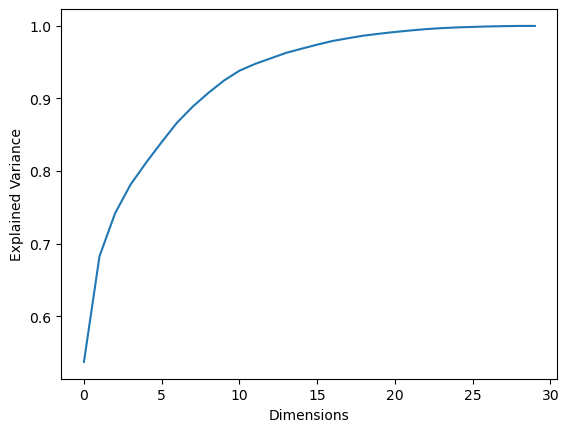

In [10]:
print("Shape x_PCA: ", X_pca.shape)
expl = pca.explained_variance_ratio_

for x in range(0, len(eu_df.columns), 2):
    print("Explained Variance: " + str(x) + " components:", sum(expl[0:x]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.show()

Everything above 90% is ok, so we will go with 20 components.

In [11]:
N_COMP = 20
columns = []

for col in range(1, N_COMP+1, 1):
    columns.append("PCA" + str(col))

pca_resultado = pd.DataFrame(data=X_pca[:,0:N_COMP], columns=columns, index = y)

pca_resultado.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
Abdelkahar Kadri_Kortrijk,7.107876,0.156442,-0.042539,-0.622439,-0.056316,-1.023402,0.721123,1.750496,0.846722,-1.134366,-0.790937,0.201263,-1.628664,-0.270105,-1.163883,0.846864,0.365033,0.161468,0.077196,-0.832093
Aboubakary Koita_Sint-Truiden,7.380400,4.918003,-0.026152,2.914086,-0.365354,-1.697356,-0.718398,2.089303,1.532921,-0.707796,-1.640777,-0.989762,-1.591586,-0.113918,1.667627,0.992234,0.445508,-0.506459,0.192092,-0.651470
Adam Carlén_Göteborg,-3.440582,0.048192,0.426623,-0.053951,0.683024,-0.276232,-0.377482,1.706757,0.930521,0.415692,0.517790,0.149178,0.081912,0.388528,0.313310,0.013443,-0.213471,0.089226,0.057968,-0.010067
Adam Ståhl_Mjällby,-3.342576,1.158019,1.263006,-0.509942,0.755512,-0.311949,-0.289688,1.466545,0.277622,0.416933,0.885255,0.329871,-0.000280,0.161286,0.149210,-0.084669,-0.279580,0.102666,0.060134,-0.037380
Adem Zorgane_Charleroi,10.402794,1.247495,-0.935126,-3.097424,-1.107168,-0.581912,-0.874625,-0.186293,1.454310,1.272434,1.135263,-0.777913,0.300343,0.702212,-1.545483,-0.105457,0.928303,-0.446681,-0.309807,0.173349


The above view only show us the similarity of players for each component, but we don't want to focus on just one variable: we want to see the correlation between all of them. That's why we use the correlation matrix:

In [12]:
corr_matrix = pca_resultado.T.corr(method='pearson')

With this correlation matrix, now we are seeing how similar are players between them.

In [13]:
corr_matrix.head()

,Abdelkahar Kadri_Kortrijk,Aboubakary Koita_Sint-Truiden,Adam Carlén_Göteborg,Adam Ståhl_Mjällby,Adem Zorgane_Charleroi,Adrien Rabiot_Juventus,Ahmed Qasem_Elfsborg,Aimar Oroz_Osasuna,Alan_Moreirense,Alassane Ndao_İstanbulspor,Albert Erlykke_Bodø/Glimt,Alberto Grassi_Empoli,Albion Ademi_Värnamo,Aleix García_Girona,Aleksa Matić_Voždovac,Aleksandar Jovičić_Kisvárda,Aleksandar Pejović_Radnički Niš,Aleksandar Đorđević_FK Železničar Pančevo,Aleksander Andreassen_HamKam,Aleksander Nilsson_Sandefjord,Aleksandr Chernikov_Krasnodar,Aleksandr Golovin_Monaco,Alen Halilović_Fortuna Sittard,Alex Baena_Villarreal,Alexander Jensen_Brommapojkarna,Alexander Munksgaard_Aalesund,Alexandru Cicâldău_Konyaspor,Alexandru Maxim_Gaziantep FK,Ali Karimi_Kayserispor,Altin Zeqiri_Rizespor,Amadou Onana_Everton,Amar Memić_Karviná,Amidou Diop_Aalesund,Amine Oudrhiri_Rio Ave,Amir Abrashi_Grasshopper,Amir Al Ammari_Halmstad,Anastasios Bakasetas_Trabzonspor,Ander Guevara_Alavés,Anders Klynge_Silkeborg,Andrea Colpani_Monza,Andreas Pereira_Fulham,Andrei Yegorychev_Ural,Andrej Todoroski_Spartak Subotic,Angel Gomes_Lille,Angelo Stiller_Stuttgart,Anthony Losilla_Bochum,Antoine Bernede_Lausanne-Sport,Antoine Makoumbou_Cagliari,Anton Salétros_AIK Stockholm,Antonio Candreva_Salernitana,Antonín Fantiš_Fastav Zlín,Arbër Hoxha_Slaven Belupo,Ardon Jashari_Luzern,Arno Verschueren_Sparta R'dam,Arnór Ingvi Traustason_Norrköping,Aron Bjarnason_Sirius,Arthur Melo_Fiorentina,Arthur Vermeeren_Antwerp,Arvid Brorsson_Mjällby,Atakan Karazor_Stuttgart,Aylton Boa Morte_Kayserispor,Aytaç Kara_Kasımpaşa,Azor Matusiwa_Reims,Bartosz Slisz_Legia Warsaw,Batista Mendy_Trabzonspor,Benedik Mioč_Slaven Belupo,Benhur Keser_Rizespor,Benjamin André_Lille,Benjamin Bourigeaud_Rennes,Benjamin Stambouli_Adana Demirspor,Berkay Özcan_Başakşehir,Bernardo Silva_Manchester City,Bilal El Khannouss_Genk,Bilal Hussein_AIK Stockholm,Billy Gilmour_Brighton,Bogdan Jocic_Voždovac,Boris Cespedes_Yverdon-Sport,Boubacar Kamara_Aston Villa,Brais Méndez_Real Sociedad,Brandon Baiye_Eupen,Brian De Keersmaecker_Heracles Almelo,Bruno Fernandes_Manchester Utd,Bruno Guimarães_Newcastle Utd,Bruno Leite_Haugesund,Bryan Cristante_Roma,Bryan Heynen_Genk,Bryan Zaragoza_Granada,Calvin Stengs_Feyenoord,Calvin Twigt_Volendam,Cameron Puertas_Union SG,Can Bozdogan_Utrecht,Can Keles_Fatih Karagümrük,Carlinhos_Portimonense,Carlo Holse_Samsunspor,Charis Charisis_Sivasspor,Charles Vanhoutte_Union SG,Cheick Oumar Conde_Zürich,Christian Nørgaard_Brentford,Christian Witzig_St. Gallen,Christos Gravius_Degerfors,Claudio Falcão_Farense,Conor Gallagher_Chelsea,Costinha_Rio Ave,Curtis Edwards_Stabæk,Daisuke Yokota_Górnik Zabrze,Dal Varesanovic_Rizespor,Daler Kuzyaev_Le Havre,Damian Dąbrowski_Zagłębie Lubin,Damian Rasak_Górnik Zabrze,Damon Mirani_Volendam,Dani Rodríguez_Mallorca,Daniel Boloca_Sassuolo,Daniel Horák_Hradec Králové,Daniel Håkans_Vålerenga,Daniel Mareček_Mladá Boleslav,Daniel Parejo_Villarreal,Daniel Stensson_Sirius,Daniel Svensson_Nordsjælland,Daniel Wass_Brøndby,Danil Glebov_Rostov,Danley Jean-Jacques_Metz,Dario Šarić_Antalyaspor,Darko Nejašmić_Osijek,Dave Van Den Berg_Zwolle,David Simão_Arouca,Declan Rice_Arsenal,Dejan Zukić_Vojvodina,Denis Zakaria_Monaco,Deniz Turuc_Başakşehir,Dennis Gjengaar_Odd,Dereck Kutesa_Servette FC,Deroy Duarte_Fortuna Sittard,Dimitar Mitrovski_Varaždin,Dion Lopy_Almería,Dirk Proper_NEC Nijmegen,Dmitri Barinov_Loko Moscow,Dominik Szoboszlai_Liverpool,Douglas Luiz_Aston Villa,Dušan Tadić_Fenerbahçe,Dwight McNeil_Everton,Eder González_Atromitos,Edin Višća_Trabzonspor,Eduard Spertsyan_Krasnodar,Efecan Karaca_Alanyaspor,Efkan Bekiroglu_Ankaragücü,Elvis Rexhbeçaj_Augsburg,Emil Breivik_Molde,Emir Sahiti_Hajduk Split,Emmanuel Boateng_Elfsborg,Emre Akbaba_Adana Demirspor,Emre Kılınç_Samsunspor,Enzo Barrenechea_Frosinone,Enzo Fernández_Chelsea,Eren Dinkçi_Heidenheim,Eric Larsson_OFI Crete,Eric Martel_Köln,Eric Ouma_AIK Stockholm,Erik Ahlstrand_Halmstad,Erik Kusnyír_Debrecen,Erlend Segberg_Aalesund,Ermedin Demirović

### Finding similarities

Now that we have finished the boring part, let's now release the treasure of this notebook: a function to see, at a glance, the most similar players to our target.

So, this is the function:

In [14]:
def GetSimilarPlayers(PlayerName, numPlayers, corr_matrix):
    
    SimPlayers = pd.DataFrame(columns = ['player', 'similar', 'corr_factor'])

    i = 0
    for i in range(0, numPlayers):
        row = corr_matrix.loc[corr_matrix.index == PlayerName].squeeze()

        SimPlayers.at[i, 'player'] = PlayerName
        SimPlayers.at[i, 'similar'] = row.nlargest(i+2).sort_values(ascending=True).index[0]
        SimPlayers.at[i, 'corr_factor'] = row.nlargest(i+2).sort_values(ascending=True)[0]

        i = i+1
    
    return SimPlayers

In [15]:
PlayerName = 'Jude Bellingham_Real Madrid'
NumPlayers = 30

similar_players = GetSimilarPlayers(PlayerName, NumPlayers, corr_matrix)

similar_players.head(10)

,player,similar,corr_factor
0,Jude Bellingham_Real Madrid,Magnus Mattsson_NEC Nijmegen,0.95933
1,Jude Bellingham_Real Madrid,Quinten Timber_Feyenoord,0.85888
2,Jude Bellingham_Real Madrid,João Marques_Estoril,0.858574
3,Jude Bellingham_Real Madrid,Aboubakary Koita_Sint-Truiden,0.858052
4,Jude Bellingham_Real Madrid,Hayao Kawabe_Standard Liège,0.835307
5,Jude Bellingham_Real Madrid,Willum Þór Willumsson_Go Ahead Eag,0.834574
6,Jude Bellingham_Real Madrid,Jurgen Ekkelenkamp_Antwerp,0.833936
7,Jude Bellingham_Real Madrid,Rafa Silva_Benfica,0.832822
8,Jude Bellingham_Real Madrid,Andrea Colpani_Monza,0.812493
9,Jude Bellingham_Real Madrid,Florian Wirtz_Leverkusen,0.808353


## Let's get graphical

It's great to see that list but... what if we check this similarity with a spider plot?

##### We will use mpl_soccer library

In [16]:
# import libraries
from mplsoccer import Radar, FontManager, grid, add_image
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

In [17]:
# take the values of the players we will compare
# in our case, Jude Bellingham and the two most similar players to him
similar_bellingham1 = eu[eu['player'].isin(['Jude Bellingham', 'Magnus Mattsson'])]
similar_bellingham2 = eu[eu['player'].isin(['Jude Bellingham', 'Quinten Timber'])]

As we are comparing attacking midfielders, we will follow Statsbomb criteria (https://statsbomb.com/articles/soccer/new-data-new-statsbomb-radars/) to choose the metrics the graphic will show. FBRef and Statsbomb doesn't share all the metrics, so we will choose the most similar ones when we don't have the same.

Before starting with the graphic comparison, I'll leave here the Statsbomb features and which ones we have chosen in FBRef if the open-source data provider doesn't have them.

In [18]:
# read xlsx with equivalences
sb_fbref = pd.read_excel('C:/Users/Hale/Documents/DataFC/FBRef_files/SB-FBREF.xlsx')
sb_fbref

,pos,sb_metric,fbref_metric
0,amf,dribble and carry on ball value added,SCA_TkOns
1,amf,xG,xG
2,amf,shots,Shots
3,amf,possession adjusted pressures,-
4,amf,xAG open play,xAG
...,...,...,...
66,wing,fouled,Fouled
67,wing,turnovers,Miscontrols
68,wing,touches in box,TouchAttPen
69,wing,xG/shot,npxG/Shot


In [46]:
mf_metrics = sb_fbref[sb_fbref['pos'] == 'mf']
mf_metrics = mf_metrics.drop(mf_metrics.index[6])
mf_metrics = mf_metrics.drop(mf_metrics.index[8])
mf_metrics

,pos,sb_metric,fbref_metric
39,mf,defensive action on ball value added,SCA_DefAct
40,mf,deep progressions,CarrToFinal3rd
41,mf,xAG open play,xAG
42,mf,fouled,Fouled
43,mf,turnovers,Miscontrols
44,mf,possession adjusted tackles and interceptions,TacklesWon
46,mf,% tackle/dribbled past,DribbTkld%
47,mf,on ball value added,PrgPasses


In [20]:
amf_metrics = sb_fbref[sb_fbref['pos'] == 'amf']
amf_metrics = amf_metrics.drop(amf_metrics.index[3])
amf_metrics

,pos,sb_metric,fbref_metric
0,amf,dribble and carry on ball value added,SCA_TkOns
1,amf,xG,xG
2,amf,shots,Shots
4,amf,xAG open play,xAG
5,amf,fouled,Fouled
6,amf,turnovers,Miscontrols
7,amf,touches in box,TouchAttPen
8,amf,xG/shot,npxG/Shot
9,amf,pass on ball value added,KeyPass
10,amf,shots on ball value added,SCA_Sh


In [21]:
# mattsson - belllingham
fbref_amf = amf_metrics['fbref_metric'].tolist()
player_info = similar_bellingham1.columns[:9].tolist()
cols = player_info + fbref_amf
sim_jude1 = similar_bellingham1.copy()
sim_jude1 = sim_jude1[cols]
sim_jude1 = sim_jude1.reset_index(drop=True)
sim_jude1

,league,season,team,player,player_team,nation,pos,age,born,SCA_TkOns,xG,Shots,xAG,Fouled,Miscontrols,TouchAttPen,npxG/Shot,KeyPass,SCA_Sh
0,ESP-La Liga,2324,Real Madrid,Jude Bellingham,Jude Bellingham_Real Madrid,ENG,MF,20.0,2003.0,5.0,8.2,41.0,2.6,56.0,37.0,88.0,0.18,29.0,3.0
1,NED-Eredivisie,2324,NEC Nijmegen,Magnus Mattsson,Magnus Mattsson_NEC Nijmegen,DEN,MF,24.0,1999.0,6.0,7.4,43.0,2.7,33.0,62.0,69.0,0.14,29.0,3.0


In [47]:
# timber - bellingham
fbref_mf = mf_metrics['fbref_metric'].tolist()
player_info = similar_bellingham2.columns[:9].tolist()
cols = player_info + fbref_mf
sim_jude2 = similar_bellingham2.copy()
sim_jude2 = sim_jude2[cols]
sim_jude2 = sim_jude2.reset_index(drop=True)
sim_jude2

,league,season,team,player,player_team,nation,pos,age,born,SCA_DefAct,CarrToFinal3rd,xAG,Fouled,Miscontrols,TacklesWon,DribbTkld%,PrgPasses
0,ESP-La Liga,2324,Real Madrid,Jude Bellingham,Jude Bellingham_Real Madrid,ENG,MF,20.0,2003.0,0.0,57.0,2.6,56.0,37.0,20.0,38.1,132.0
1,NED-Eredivisie,2324,Feyenoord,Quinten Timber,Quinten Timber_Feyenoord,NED,MF,22.0,2001.0,1.0,36.0,5.1,31.0,41.0,29.0,73.9,116.0


In [48]:
# params midfielder
params_mf = list(sim_jude2.columns)
params_mf = params_mf[9:]
params_mf

['SCA_DefAct',
 'CarrToFinal3rd',
 'xAG',
 'Fouled',
 'Miscontrols',
 'TacklesWon',
 'DribbTkld%',
 'PrgPasses']

In [24]:
# params attacking midfielder
params_amf = list(sim_jude1.columns)
params_amf = params_amf[9:]
params_amf

['SCA_TkOns',
 'xG',
 'Shots',
 'xAG',
 'Fouled',
 'Miscontrols',
 'TouchAttPen',
 'npxG/Shot',
 'KeyPass',
 'SCA_Sh']

In [35]:
# mattsson - bellingham
# set high and low values
#high
max1 = np.max(sim_jude1.iloc[:, 9:], axis=0)
high1 = max1 * 1.1
high1 = high1.tolist()
rounded_high1 = [round(x, 1) for x in high1]
high1 = rounded_high1

# low
min1 = np.min(sim_jude1.iloc[:, 9:], axis=0)
low1 = min1 * 0.9
low1 = low1.tolist()
rounded_low1 = [round(x, 1) for x in low1]
low1 = rounded_low1

print(high1)
print(low1)

[6.6, 9.0, 47.3, 3.0, 61.6, 68.2, 96.8, 0.2, 31.9, 3.3]
[4.5, 6.7, 36.9, 2.3, 29.7, 33.3, 62.1, 0.1, 26.1, 2.7]


In [49]:
# timber - bellingham
# set high and low values
#high
max2 = np.max(sim_jude2.iloc[:, 9:], axis=0)
high2 = max2 * 1.1
high2 = high2.tolist()
rounded_high2 = [round(x, 2) for x in high2]
high2 = rounded_high2

# low
min2 = np.min(sim_jude2.iloc[:, 9:], axis=0)
low2 = min2 * 0.9
low2 = low2.tolist()
rounded_low2 = [round(x, 2) for x in low2]
low2 = rounded_low2

print(high2)
print(low2)

[1.1, 62.7, 5.61, 61.6, 45.1, 31.9, 81.29, 145.2]
[0.0, 32.4, 2.34, 27.9, 33.3, 18.0, 34.29, 104.4]


In [50]:
mf_bellingham_values = sim_jude2.iloc[0, 9:]
amf_bellingham_values = sim_jude1.iloc[0, 9:]
mattsson_values = sim_jude1.iloc[1, 9:]
timber_values = sim_jude2.iloc[1, 9:]

Once we have prepared everything, it's time to create and customize the radar plot.

In [39]:
# let's upload some fonts
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [40]:
# mattsson - bellingham

lower_is_better1 = ['Miscontrols']
# now it's time to create the radar
radar_amf = Radar(params_amf, low1, high1,
              lower_is_better = lower_is_better1,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params_amf),
              num_rings=10,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

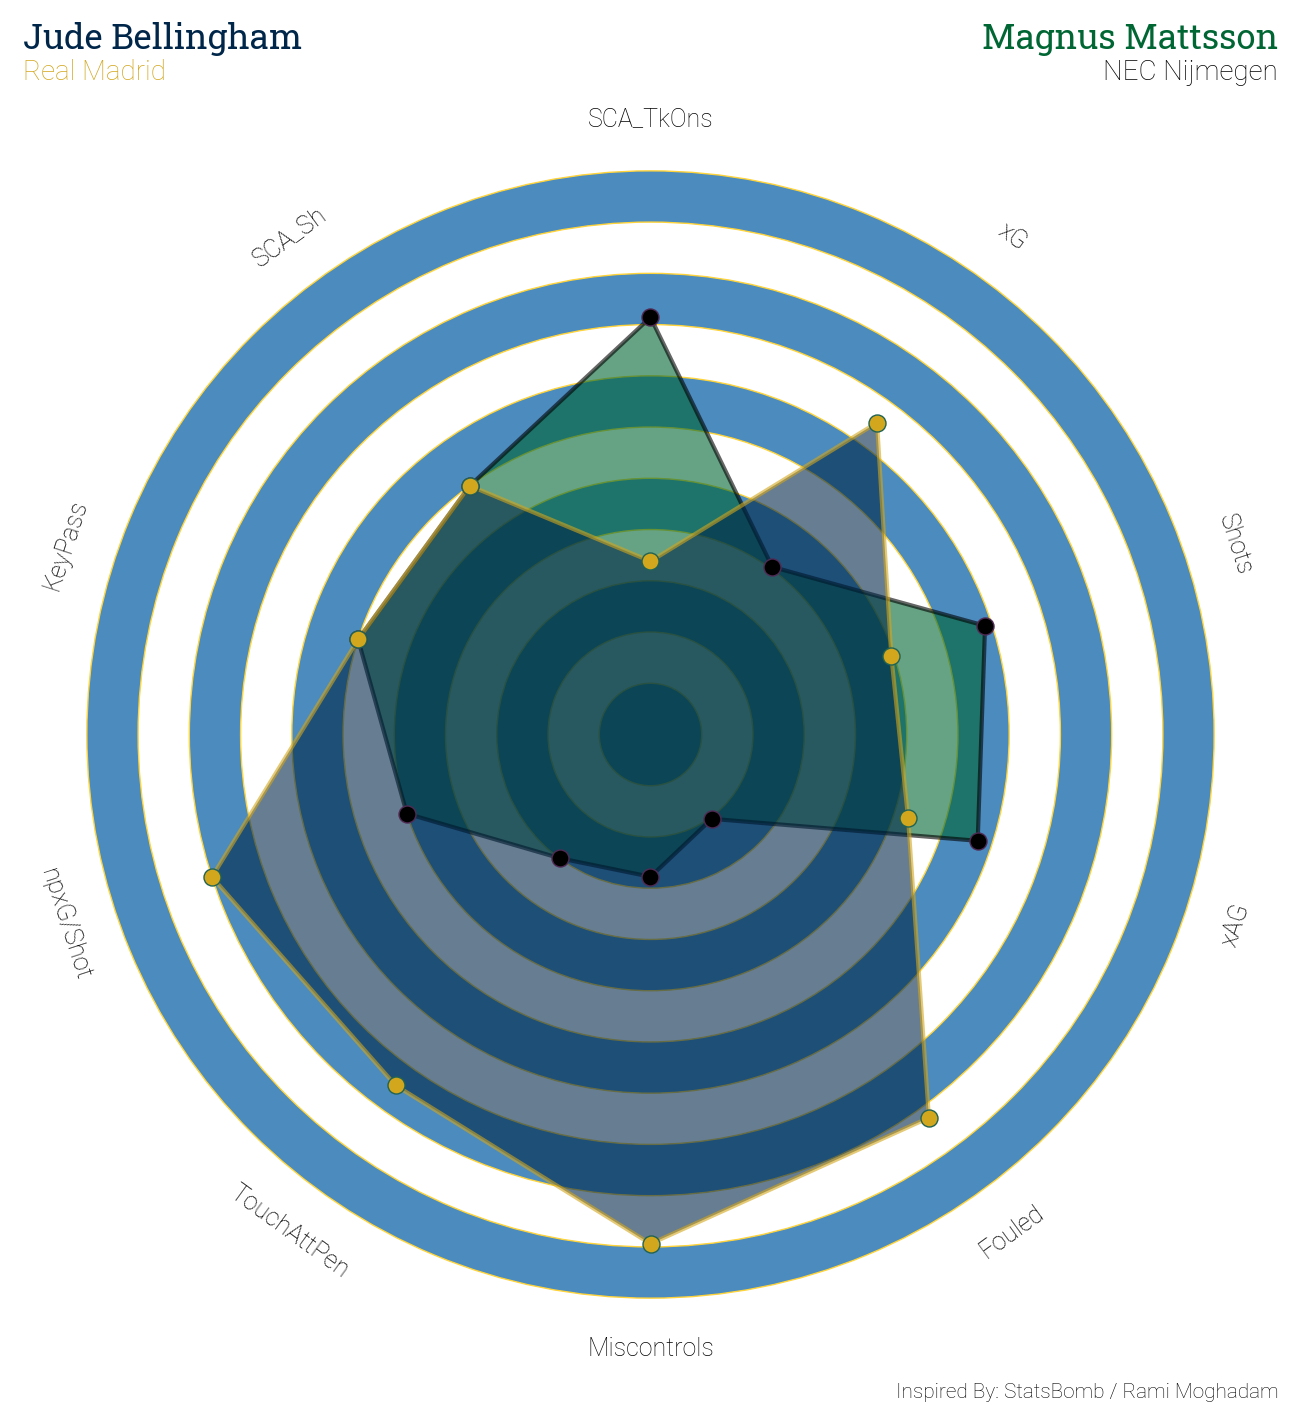

In [41]:
# mattsson - bellingham

# create figure
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)
fig.set_facecolor('#FFFFFF')

# plot radar
radar_amf.setup_axis(ax=axs['radar'], facecolor='#FFFFFF')  # format axis as a radar
rings_inner = radar_amf.draw_circles(ax=axs['radar'], facecolor='#4B8BBE', edgecolor='#FFD43B')

radar1, vertices1 = radar_amf.draw_radar_solid(mattsson_values, ax=axs['radar'],
                                           kwargs={'facecolor': '#006633',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#000000',
                                                   'lw': 3})

radar2, vertices2 = radar_amf.draw_radar_solid(amf_bellingham_values, ax=axs['radar'],
                                           kwargs={'facecolor': '#002749',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#d2a61d',
                                                   'lw': 3})

axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
           c='#000000', edgecolors='#502a54', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
           c='#d2a61d', edgecolors='#216352', marker='o', s=150, zorder=2)

# range_labels = radar.draw_range_labels(ax=ax, fontsize=25, fontproperties=robotto_thin.prop)
param_labels1 = radar_amf.draw_param_labels(ax=axs['radar'], fontsize=18, fontproperties=robotto_thin.prop)

# add some text
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Jude Bellingham', fontsize=25, color='#002749',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Real Madrid', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#d2a61d')
title5_text = axs['title'].text(0.99, 0.65, 'Magnus Mattsson', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#006633')
title6_text = axs['title'].text(0.99, 0.25, 'NEC Nijmegen', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#000000')

plt.savefig("radar.png")

In [51]:
# timber - bellingham

lower_is_better2 = ['Miscontrols']
# now it's time to create the radar
radar_mf = Radar(params_mf, low2, high2,
              lower_is_better = lower_is_better2,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params_mf),
              num_rings=10,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

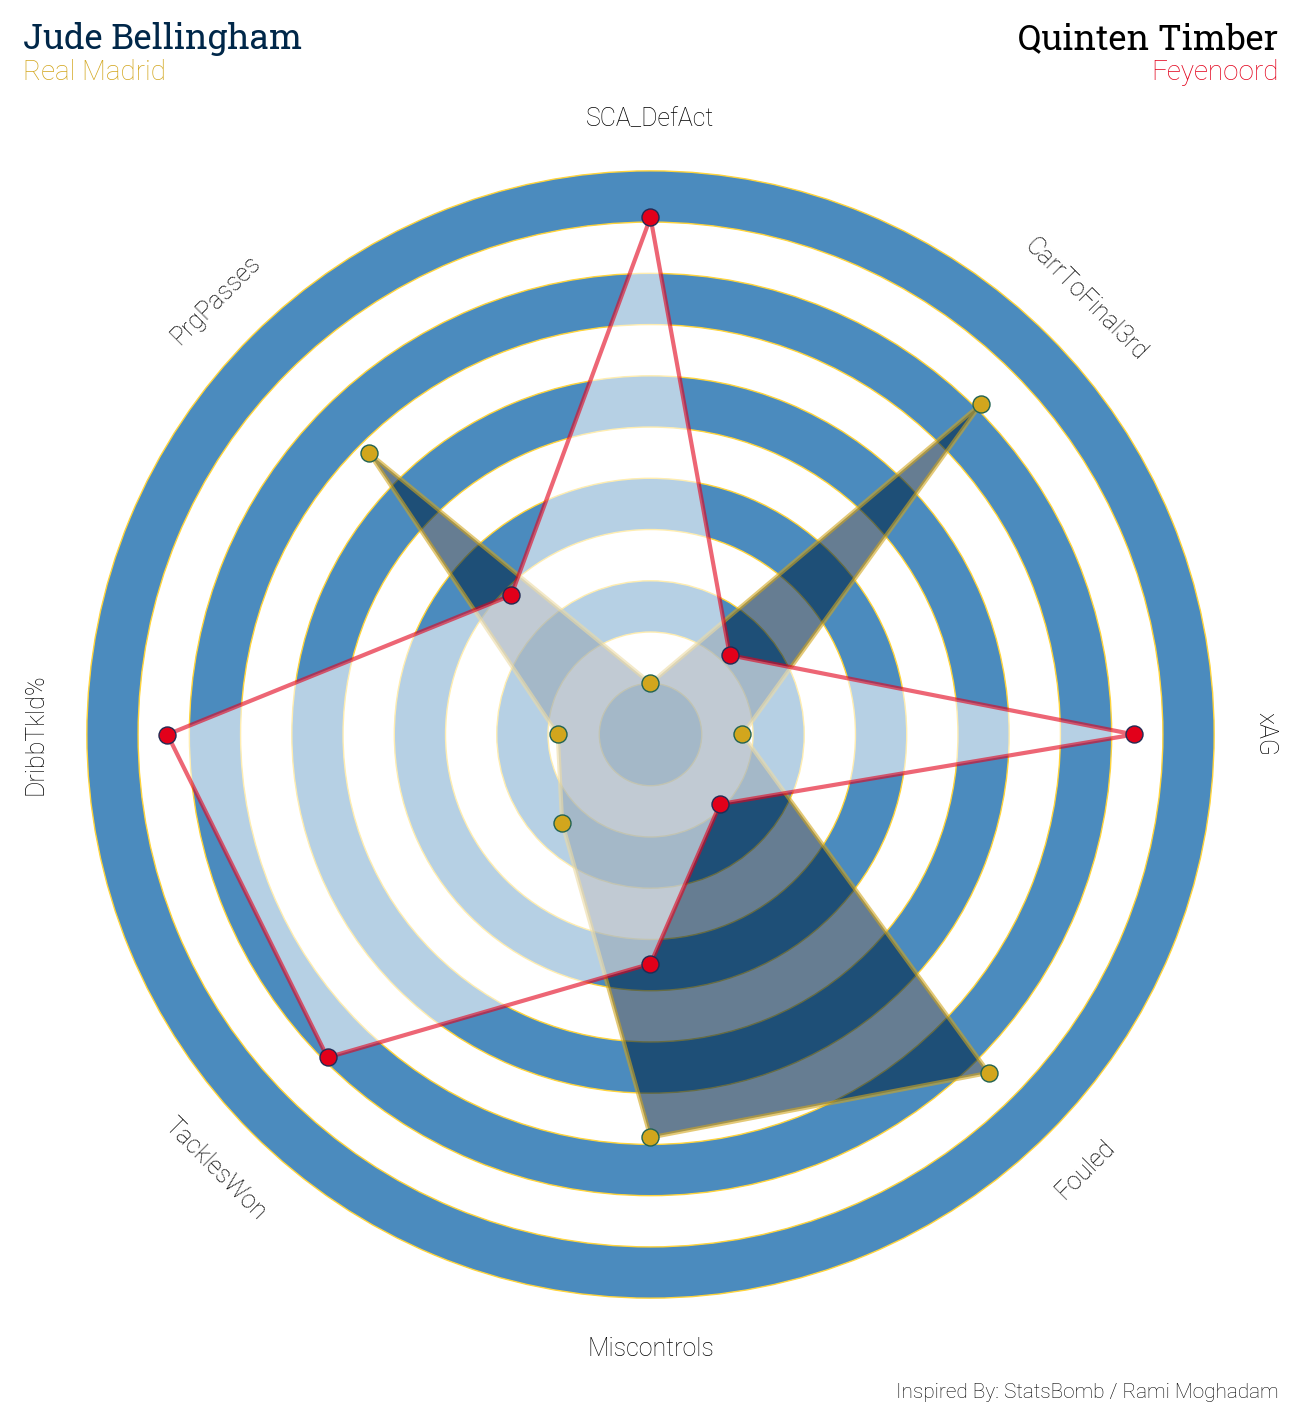

In [52]:
# timber - bellingham

# create figure
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)
fig.set_facecolor('#FFFFFF')

# plot radar
radar_mf.setup_axis(ax=axs['radar'], facecolor='#FFFFFF')  # format axis as a radar
rings_inner = radar_mf.draw_circles(ax=axs['radar'], facecolor='#4B8BBE', edgecolor='#FFD43B')


radar22, vertices22 = radar_mf.draw_radar_solid(mf_bellingham_values, ax=axs['radar'],
                                           kwargs={'facecolor': '#002749',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#d2a61d',
                                                   'lw': 3})

radar3, vertices3 = radar_mf.draw_radar_solid(timber_values, ax=axs['radar'],
                                           kwargs={'facecolor': '#ffffff',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#e2001a',
                                                   'lw': 3})

axs['radar'].scatter(vertices22[:, 0], vertices22[:, 1],
           c='#d2a61d', edgecolors='#216352', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices3[:, 0], vertices3[:, 1],
           c='#e2001a', edgecolors='#222b54', marker='o', s=150, zorder=2)

# range_labels = radar.draw_range_labels(ax=ax, fontsize=25, fontproperties=robotto_thin.prop)
param_labels = radar_mf.draw_param_labels(ax=axs['radar'], fontsize=18, fontproperties=robotto_thin.prop)

# add some text
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title11_text = axs['title'].text(0.01, 0.65, 'Jude Bellingham', fontsize=25, color='#002749',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title22_text = axs['title'].text(0.01, 0.25, 'Real Madrid', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#d2a61d')

title55_text = axs['title'].text(0.99, 0.65, 'Quinten Timber', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#000000')
title66_text = axs['title'].text(0.99, 0.25, 'Feyenoord', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#e2001a')

plt.savefig("radar1.png")